<a href="https://colab.research.google.com/github/phurinat-udo/scpy204_2019s2_Phurinat/blob/master/Learning_Git_and_SQL_6105017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Write on google colaboratory. I can not import SDSS from Astroquery, so I saved the data in .csv file and pushed into Github.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy as astp

SQL Code 


---


SELECT

 s.z, s.zErr, p.petroMag_g, p.petroMagErr_g, p.ra, p.dec, s.bestObjID

FROM photoObj p

JOIN specObj s ON s.bestObjID = p.objID

WHERE
 s.class = 'qso'
 and s.z between 0.3 and 0.4
 and s.zWarning = 0
 and s.zErr <= 0.01
 and p.petroMagErr_g <= 0.99

Use package Pandas to read .csv file.

In [105]:
t100_ptrmg = pd.read_csv('/content/drive/My Drive/2nd Year/Data for Computer Programming/Data_err_selected2.csv')
t100_ptrmg

,z,zErr,petroMag_g,petroMagErr_g,ra,dec,bestObjID
0,0.379712,0.000055,19.80988,0.035050,213.867705,-1.087488,1237648702979834128
1,0.330100,0.000067,18.00029,0.009621,204.360327,0.974607,1237648705659994170
2,0.361430,0.000041,19.37523,0.050012,218.129107,-0.874701,1237648720173662500
3,0.326221,0.000057,21.27988,0.165978,61.062179,-6.567469,1237649961386180958
4,0.316903,0.000019,20.62655,0.138988,57.686082,-5.794490,1237649962995417509
...,...,...,...,...,...,...,...
7395,0.352397,0.000049,20.19564,0.035259,358.654332,20.263181,1237680246813819201
7396,0.308576,0.000021,19.33901,0.016194,338.092041,19.482018,1237680297272148243
7397,0.337833,0.000048,20.77502,0.055319,332.640623,28.564204,1237680474438960043
7398,0.397064,0.000044,21.54621,0.192959,346.374482,33.034289,1237680503434183637


Select column of red shift and Petrosian magnitude from the dataframe that has read by Pandas package.

In [0]:
zdata = t100_ptrmg['z']
zerr = t100_ptrmg['zErr']
#print(zdata)
#print(zerr)

In [0]:
ptrmgdata = t100_ptrmg['petroMag_g']
ptrmgerr = t100_ptrmg['petroMagErr_g']
#print(ptrmgdata)
#print(ptrmgerr)

Use the data from the selection to plot graph relation between Petrosian magnitude and red shift.

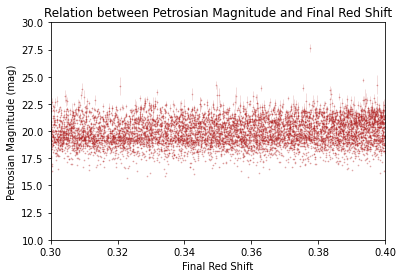

In [110]:
x = zdata
x_err = zerr<=1
y = ptrmgdata
y_err = ptrmgerr<=1

figure = plt.figure(0)
#plt.xscale("log")
axes = plt.gca()
axes.set_xlim([0.3,0.4])
axes.set_ylim([10,30])
#plt.plot(x, y, 'o', markersize=0.9, color='firebrick', label="Petrosian Magnitude")
plt.errorbar(x, y, xerr=zerr, yerr=ptrmgerr, fmt='o', markersize=0.75, alpha=0.3, elinewidth=0.5, color='firebrick')
plt.title('Relation between Petrosian Magnitude and Final Red Shift', fontdict=None, loc='center', )
plt.ylabel('Petrosian Magnitude (mag)')
plt.xlabel('Final Red Shift')
#plt.xticks(rotation=45)
#plt.legend(frameon=True, labelspacing=1, title='Country', bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.savefig(figsize=(4,6), dpi=600,fname='Petrosian_Magnitude.png' ,bbox_inches='tight' )
plt.show()

From the graph, there are too much points of data. So, I saved in to 2 graph which one of two has the transparency to looking for the error bar.